# Flight Price

## Q1

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel("flight_price.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
len(df.columns)

11

In [6]:
df.shape

(10683, 11)

## Q2

<Axes: xlabel='Price', ylabel='Count'>

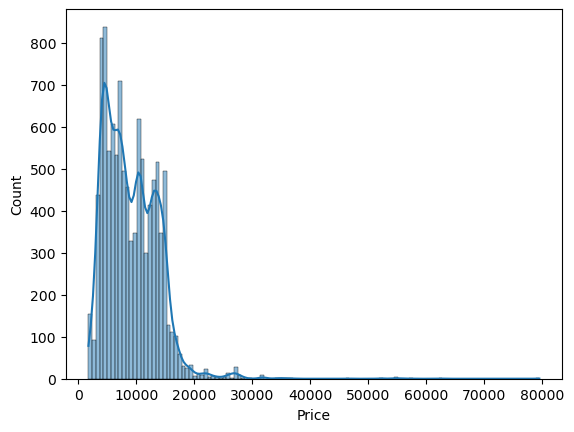

In [8]:
sns.histplot(data=df,x="Price",kde=True)

In [9]:
df["Price"].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

## Q3

In [10]:
minimum_value = min(df["Price"])
maximum_value = max(df["Price"])

Range_value = maximum_value - minimum_value
print("Range of Prices: ",Range_value)

Range of Prices:  77753


## Q4

In [13]:
groups_df = df.groupby("Airline")

In [16]:
groups_df["Price"].sum().sort_values(ascending=False).head(5)

Airline
Jet Airways          44817461
Air India            16838841
Multiple carriers    13039603
IndiGo               11648071
Vistara               3734451
Name: Price, dtype: int64

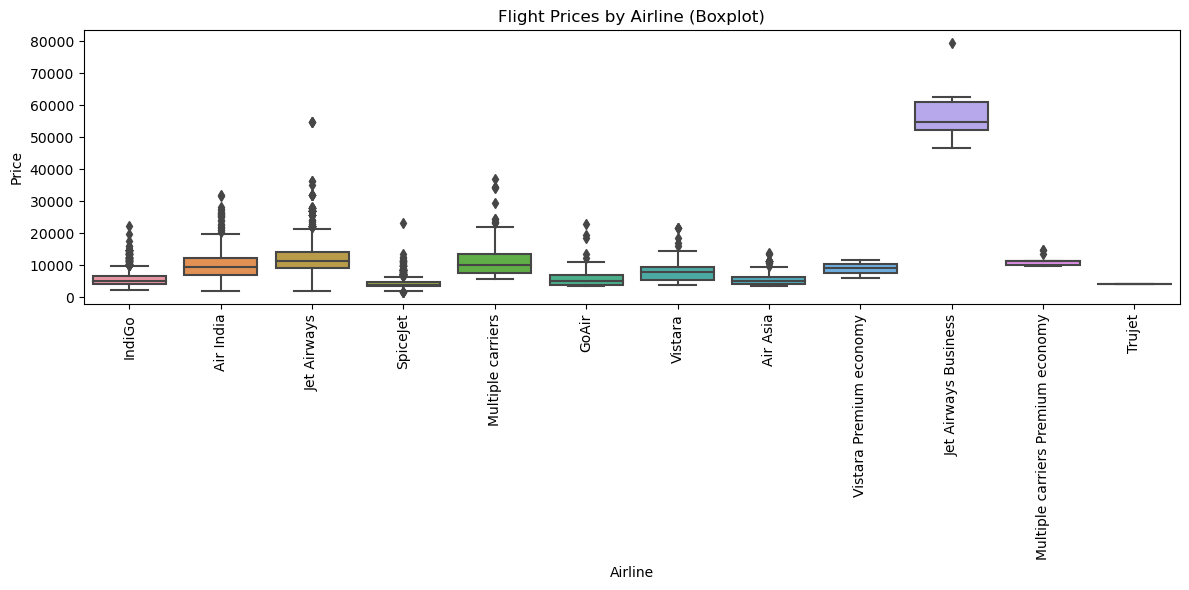

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x="Airline",y="Price")
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Flight Prices by Airline (Boxplot)')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

## Q5

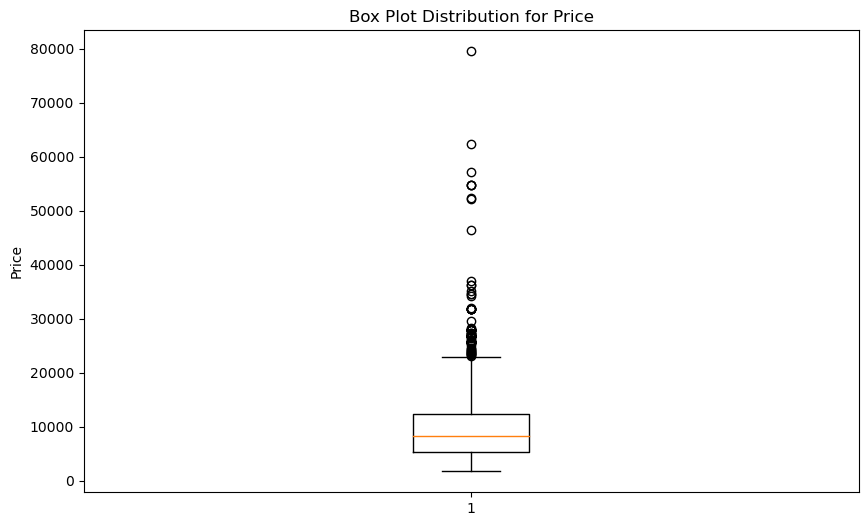

In [23]:
plt.figure(figsize=(10,6))
plt.boxplot(data=df,x= "Price")
plt.ylabel("Price")
plt.title("Box Plot Distribution for Price")
plt.show()

1. Skewing Statistics: Outliers can significantly affect summary statistics such as the mean and standard deviation. If your dataset has extreme outliers, the mean may not be representative of the central tendency of the majority of the data.

2. Influence on Models: Outliers can distort the results of statistical models. Some machine learning algorithms are sensitive to outliers and may give undue importance to them.

## Q6

In [24]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [26]:
df["Datetime_Journey"] = pd.to_datetime(df['Date_of_Journey'])

/tmp/ipykernel_80462/3338911318.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Datetime_Journey"] = pd.to_datetime(df['Date_of_Journey'])


In [27]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Datetime_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019-03-24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019-05-01


In [29]:
df["Day"] = df["Datetime_Journey"].dt.day
df["Month"] = df["Datetime_Journey"].dt.month
df["Year"] = df["Datetime_Journey"].dt.year

In [31]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Datetime_Journey,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019-03-24,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019-05-01,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019-06-09,9,6,2019


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Airline           10683 non-null  object        
 1   Date_of_Journey   10683 non-null  object        
 2   Source            10683 non-null  object        
 3   Destination       10683 non-null  object        
 4   Route             10682 non-null  object        
 5   Dep_Time          10683 non-null  object        
 6   Arrival_Time      10683 non-null  object        
 7   Duration          10683 non-null  object        
 8   Total_Stops       10682 non-null  object        
 9   Additional_Info   10683 non-null  object        
 10  Price             10683 non-null  int64         
 11  Datetime_Journey  10683 non-null  datetime64[ns]
 12  Day               10683 non-null  int32         
 13  Month             10683 non-null  int32         
 14  Year              1068

In [33]:
df.drop("Date_of_Journey",axis=1,inplace=True)

In [35]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Datetime_Journey,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019-03-24,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019-05-01,1,5,2019


In [36]:
df.drop("Route",axis=1,inplace=True)

In [37]:
df.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Datetime_Journey,Day,Month,Year
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019-03-24,24,3,2019
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,2019-05-01,1,5,2019


In [38]:
df.drop("Datetime_Journey",axis=1,inplace=True)

In [39]:
df.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


In [42]:
df["Departure_hour"] = df["Dep_Time"].str.split(':').str[0]

In [44]:
df["Departure_min"] = df["Dep_Time"].str.split(':').str[1]

In [45]:
df["Departure_hour"]  = df["Departure_hour"].astype(int)
df["Departure_min"]  = df["Departure_min"].astype(int)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Dep_Time         10683 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Day              10683 non-null  int32 
 10  Month            10683 non-null  int32 
 11  Year             10683 non-null  int32 
 12  Departure_hour   10683 non-null  int64 
 13  Departure_min    10683 non-null  int64 
dtypes: int32(3), int64(3), object(8)
memory usage: 1.0+ MB


In [47]:
df.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50


In [59]:
df["Arrival_Time"] = df["Arrival_Time"].apply(lambda x:x.split(" ")[0])

In [60]:
df.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50


In [67]:
df["Arrival_hour"] = df["Arrival_Time"].str.split(":").str[0]
df["Arrival_min"] = df["Arrival_Time"].str.split(":").str[1]

In [68]:
df.head(3)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Departure_hour,Departure_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,22,20,01,10
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,09:25,04:25,19h,2 stops,No info,13882,9,6,2019,9,25,04,25


In [70]:
df["Arrival_hour"] = df["Arrival_hour"].astype(int)
df["Arrival_min"] = df["Arrival_min"].astype(int)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Dep_Time         10683 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Day              10683 non-null  int32 
 10  Month            10683 non-null  int32 
 11  Year             10683 non-null  int32 
 12  Departure_hour   10683 non-null  int64 
 13  Departure_min    10683 non-null  int64 
 14  Arrival_hour     10683 non-null  int64 
 15  Arrival_min      10683 non-null  int64 
dtypes: int32(3), int64(5), object(8)
memory usage: 1.2+ MB


In [73]:
df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [76]:
mode_value = df["Total_Stops"].mode()[0]
mode_value

'1 stop'

In [78]:
df["Total_Stops"] = df["Total_Stops"].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [79]:
df.head(3)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Departure_hour,Departure_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,22:20,01:10,2h 50m,0,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,09:25,04:25,19h,2,No info,13882,9,6,2019,9,25,4,25


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Dep_Time         10683 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10683 non-null  int64 
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Day              10683 non-null  int32 
 10  Month            10683 non-null  int32 
 11  Year             10683 non-null  int32 
 12  Departure_hour   10683 non-null  int64 
 13  Departure_min    10683 non-null  int64 
 14  Arrival_hour     10683 non-null  int64 
 15  Arrival_min      10683 non-null  int64 
dtypes: int32(3), int64(6), object(7)
memory usage: 1.2+ MB


In [81]:
monthly_Groups = df.groupby("Month")

In [99]:
monthly_Groups["Price"].sum().sort_values(ascending=False)

Month
5    31635040
6    30141510
3    29073812
4     6226744
Name: Price, dtype: int64

In [100]:
import calendar
print("We have highest sales in {} - {}".format(calendar.month_name[5],31635040))

We have highest sales in May - 31635040


- Peak Travel Seasons are March,May and June. But May has larger spendings among these.
- People in March,May and June tend to travel more


In [89]:
monthly_Groups["Price"].mean().sort_values(ascending=False)

Month
3    10673.205580
5     9127.247548
6     8828.796134
4     5770.847081
Name: Price, dtype: float64

In [103]:
yearly_Groups = df.groupby("Day")

In [105]:
yearly_Groups["Price"].sum().sort_values(ascending=False).head(5)

Day
9     13429373
6     13384125
1     11279591
21     9278806
27     9270665
Name: Price, dtype: int64

Though this may not be very beneficially but we can still say that people who travel more on these dates (1,9,6,21,27) tend to spend more 

In [106]:
groups = df.groupby(["Month","Airline"])

In [112]:
groups["Price"].sum()

Month  Airline                          
3      Air Asia                               359281
       Air India                             5670866
       GoAir                                  324971
       IndiGo                                4089391
       Jet Airways                          12032459
       Jet Airways Business                   350152
       Multiple carriers                     3978038
       Multiple carriers Premium economy      148445
       SpiceJet                               952660
       Trujet                                   4140
       Vistara                               1142491
       Vistara Premium economy                 20918
4      Air Asia                               274303
       Air India                              925086
       GoAir                                  217951
       IndiGo                                1496118
       Jet Airways                           2046290
       Multiple carriers                      137875
     

## Insights
- In March,People have spent more on Jet Airways and spent 12032459
- In April,People have spent more on Jet Airways and spent 2046290
- In May,People have spent more on Jet Airways and spent 16132880
- In June,People have spent more on Jet Airways and spent 14605832

1. People have a trust on Jet Airways 
2. I would importantly use date/time features 

## Q7

In [113]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Departure_hour,Departure_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,22:20,01:10,2h 50m,0,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,09:25,04:25,19h,2,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1,No info,13302,1,3,2019,16,50,21,35


In [116]:
df["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [117]:
source_groups = df.groupby("Source")

In [121]:
source_groups["Price"].sum().sort_values(ascending=False)

Source
Delhi       47817435
Kolkata     26293736
Banglore    17614369
Mumbai       3526617
Chennai      1824949
Name: Price, dtype: int64

## Insights

- The Flights which run from Delhi earns the most 

In [122]:
new_source_group = df.groupby(["Source","Airline"])

In [126]:
new_source_group["Price"].sum()

Source    Airline                          
Banglore  Air Asia                               407111
          Air India                             3067082
          GoAir                                  460246
          IndiGo                                2758361
          Jet Airways                           8685125
          Jet Airways Business                   251377
          SpiceJet                               823603
          Vistara                               1143702
          Vistara Premium economy                 17762
Chennai   Air India                              147391
          IndiGo                                 835133
          SpiceJet                               511171
          Vistara                                322129
          Vistara Premium economy                  9125
Delhi     Air Asia                               624334
          Air India                             7470051
          GoAir                                  500624
    

In [132]:
df.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Departure_hour,Departure_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,22:20,01:10,2h 50m,0,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2,No info,7662,1,5,2019,5,50,13,15


In [139]:
df["Duration_hour"] = df["Duration"].str.split(' ').str[0].str.split('h').str[0]

In [140]:
df.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Departure_hour,Departure_min,Arrival_hour,Arrival_min,Duration_hour
0,IndiGo,Banglore,New Delhi,22:20,01:10,2h 50m,0,No info,3897,24,3,2019,22,20,1,10,2
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2,No info,7662,1,5,2019,5,50,13,15,7


In [142]:
df["Duration_hour"].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [143]:
df[df["Duration_hour"]=="5m"]

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Departure_hour,Departure_min,Arrival_hour,Arrival_min,Duration_hour
6474,Air India,Mumbai,Hyderabad,16:50,16:55,5m,2,No info,17327,6,3,2019,16,50,16,55,5m


In [145]:
df.drop(6474,axis=0,inplace=True)

In [146]:
df["Duration_hour"].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '41', '40'], dtype=object)

In [147]:
df["Duration_hour"] = df["Duration_hour"].astype(int)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Dep_Time         10682 non-null  object
 4   Arrival_Time     10682 non-null  object
 5   Duration         10682 non-null  object
 6   Total_Stops      10682 non-null  int64 
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   Day              10682 non-null  int32 
 10  Month            10682 non-null  int32 
 11  Year             10682 non-null  int32 
 12  Departure_hour   10682 non-null  int64 
 13  Departure_min    10682 non-null  int64 
 14  Arrival_hour     10682 non-null  int64 
 15  Arrival_min      10682 non-null  int64 
 16  Duration_hour    10682 non-null  int64 
dtypes: int32(3), int64(7), object(7)
mem

In [149]:
df.drop("Duration",axis=1,inplace=True)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Dep_Time         10682 non-null  object
 4   Arrival_Time     10682 non-null  object
 5   Total_Stops      10682 non-null  int64 
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   Day              10682 non-null  int32 
 9   Month            10682 non-null  int32 
 10  Year             10682 non-null  int32 
 11  Departure_hour   10682 non-null  int64 
 12  Departure_min    10682 non-null  int64 
 13  Arrival_hour     10682 non-null  int64 
 14  Arrival_min      10682 non-null  int64 
 15  Duration_hour    10682 non-null  int64 
dtypes: int32(3), int64(7), object(6)
memory usage: 1.3+ MB


In [151]:
df.drop("Arrival_Time",axis=1,inplace=True)
df.drop("Dep_Time",axis=1,inplace=True)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Total_Stops      10682 non-null  int64 
 4   Additional_Info  10682 non-null  object
 5   Price            10682 non-null  int64 
 6   Day              10682 non-null  int32 
 7   Month            10682 non-null  int32 
 8   Year             10682 non-null  int32 
 9   Departure_hour   10682 non-null  int64 
 10  Departure_min    10682 non-null  int64 
 11  Arrival_hour     10682 non-null  int64 
 12  Arrival_min      10682 non-null  int64 
 13  Duration_hour    10682 non-null  int64 
dtypes: int32(3), int64(7), object(4)
memory usage: 1.1+ MB


In [153]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Departure_hour,Departure_min,Arrival_hour,Arrival_min,Duration_hour
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,22,20,1,10,2
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,5,50,13,15,7


In [154]:
df["Total_Stops"].unique()

array([0, 2, 1, 3, 4])

In [155]:
stops_group = df.groupby("Total_Stops")

In [157]:
stops_group["Price"].sum().sort_values(ascending=False)

Total_Stops
1    59599425
2    19310701
0    17541927
3      590040
4       17686
Name: Price, dtype: int64

## Insights

- People often take flights with less stops
- with more than two stops ,We can assume that flight prices go down

1. I would first of all Price feature and Total stops can also be beneficiary for taking insights

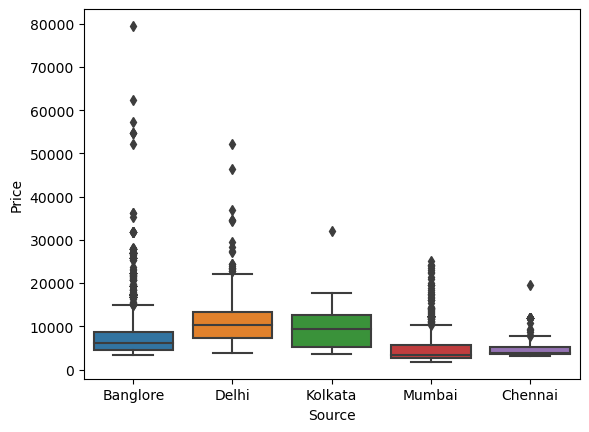

In [166]:
sns.boxplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False))
plt.show()

## Q8

In [167]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Departure_hour,Departure_min,Arrival_hour,Arrival_min,Duration_hour
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,22,20,1,10,2
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,5,50,13,15,7


In [168]:
destination_grp = df.groupby("Destination")

In [170]:
destination_grp["Price"].sum().sort_values(ascending=False)

Destination
Cochin       47817435
Banglore     26293736
New Delhi    11107312
Delhi         6507057
Hyderabad     3509290
Kolkata       1824949
Name: Price, dtype: int64

## Insights

- People go more often to Cochin (the ticket prices shows itself)
- People spend more on going destinations like Cochin ,Bangalore ,New Delhi


In [171]:
duration_groups = df.groupby("Duration_hour")

In [174]:
duration_groups["Price"].sum().sort_values(ascending=False).head(10)

Duration_hour
2     12170339
7      5618778
9      4845711
12     4754509
13     4673693
8      4604949
5      4319030
11     4132698
10     4005822
6      3908766
Name: Price, dtype: int64

## Insights

- Duration doesnot effect the flight prices.
- Two hour flights generate more flight prices.

# Google Playstore:

In [7]:
df1 = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv")
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Q9

In [177]:
# Number of Dimensions
len(df1.columns)


13

In [178]:
df1.shape

(10841, 13)

## Q10

In [202]:
cat_groups["Rating"].mean().sort_values(ascending=False).head()

Category
EVENTS                 4.435556
EDUCATION              4.389032
ART_AND_DESIGN         4.358065
BOOKS_AND_REFERENCE    4.346067
PERSONALIZATION        4.335987
Name: Rating, dtype: float64

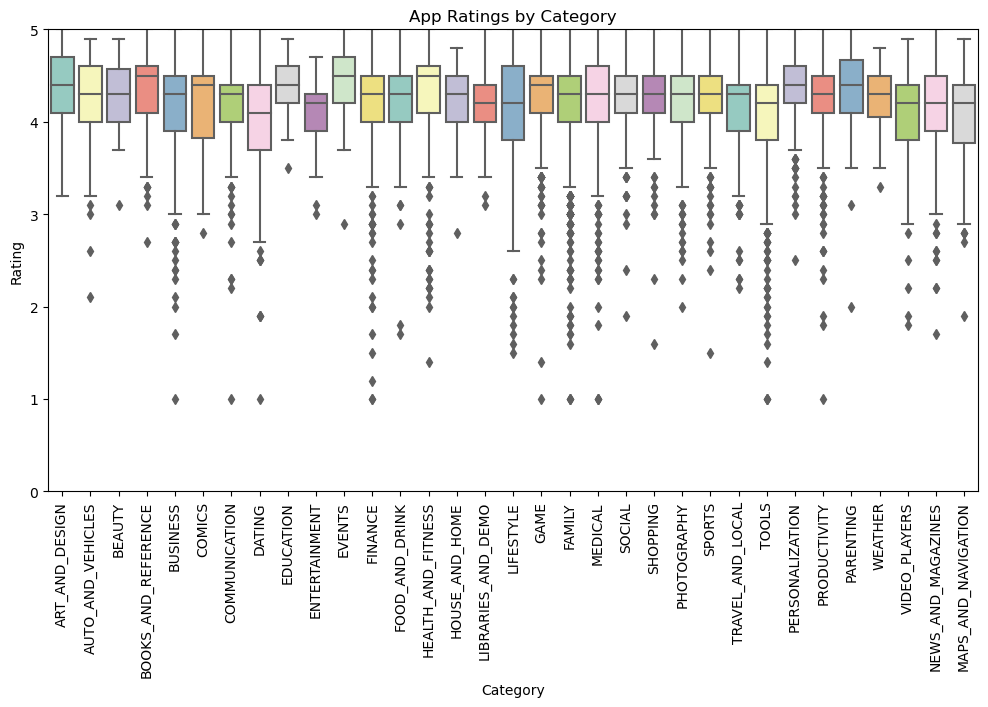

In [209]:
plt.figure(figsize=(12, 6))  
sns.boxplot(x='Category', y='Rating', data=df1, palette='Set3')
plt.xticks(rotation=90)  
plt.title('App Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.ylim(0, 5)  

# Show the plot
plt.show()

## Q11

In [210]:
df1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

## Insights

- Rating column has 1474 missing values
- Type column has only 1 missing value
- Current Ver column has 8 missing values
- Android Ver column has only 2 missing values

1. Incomplete Information: Missing values represent incomplete or unknown information. Depending on the columns with missing data, it can affect the completeness of your analysis.

2. Bias in Descriptive Statistics: Descriptive statistics (mean, median, etc.) can be biased if missing values are not handled. For example, if you calculate the mean of a column with missing values, it may not accurately represent the central tendency.

3. Modeling: For predictive modeling, missing values in the target variable or predictor variables can lead to errors in model training and predictions. Some machine learning algorithms cannot handle missing values.

## Q12

In [8]:
df1 = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv")
df1.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [249]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [250]:
df1.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [252]:
df1.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [253]:
df1["Reviews"].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [255]:
df1["Reviews"].str.isnumeric().sum()

10840

In [257]:
df1[~df1["Reviews"].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [9]:
df_copy = df1.copy()

In [10]:
df_copy.drop(10472,axis=0,inplace=True)

In [11]:
df_copy[~df_copy["Reviews"].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [12]:
df_copy["Reviews"] = df_copy['Reviews'].astype(int)

In [13]:
df_copy["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [14]:
df_copy["Size"].isnull().sum()

0

In [15]:
df_copy["Size"] = df_copy["Size"].str.replace("M","000")
df_copy["Size"] = df_copy["Size"].str.replace("k","")
df_copy["Size"] = df_copy["Size"].replace("Varies with device",np.nan)
df_copy["Size"] = df_copy["Size"].astype(float)

In [16]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


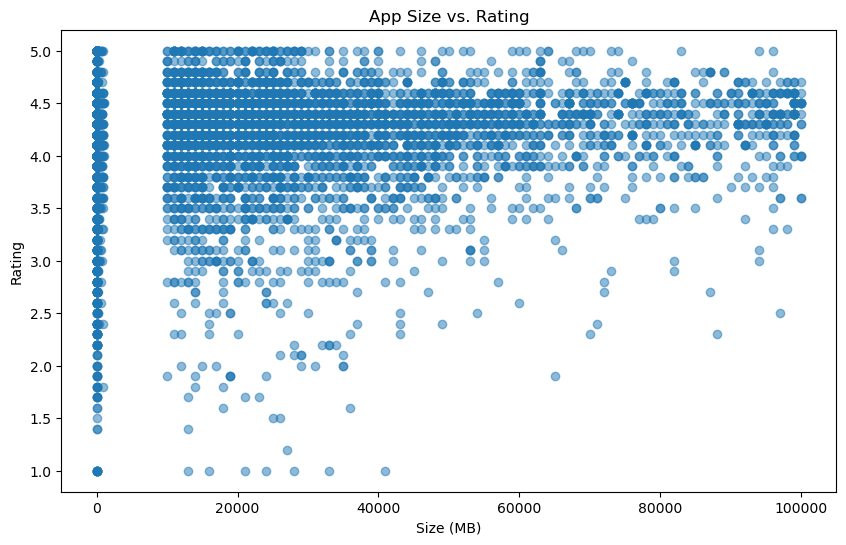

In [17]:
plt.figure(figsize=(10, 6))  
plt.scatter(df_copy['Size'], df_copy['Rating'], alpha=0.5)
plt.title('App Size vs. Rating')
plt.xlabel('Size (MB)')
plt.ylabel('Rating')
plt.show()

## Q13

In [18]:
df_copy.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [19]:
df_copy["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [20]:
df_copy["Price"] = df_copy["Price"].str.replace("$","")

In [21]:
df_copy["Price"].str.isnumeric().sum()

10040

In [22]:
df_copy.shape

(10840, 13)

In [23]:
df_copy["Price"] = df_copy["Price"].astype(float)

In [24]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.2+ MB


In [25]:
average_prices = df_copy.groupby("Type")["Price"].mean()

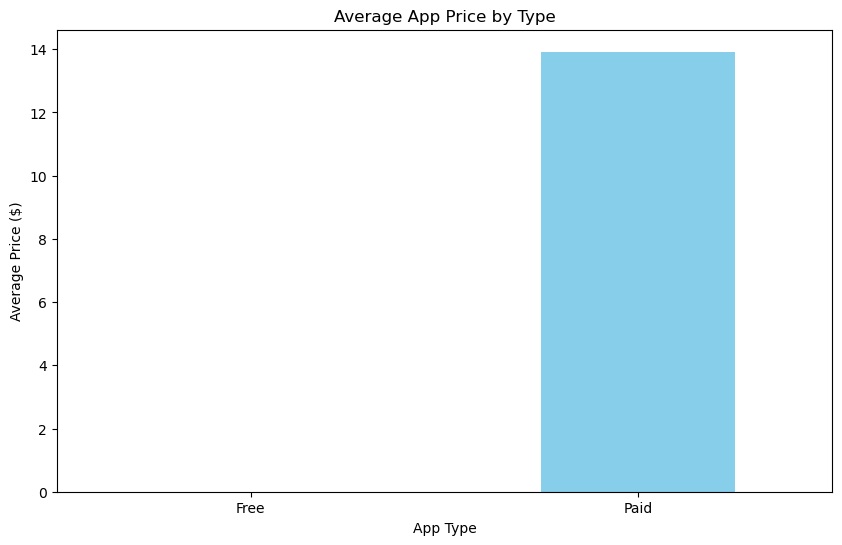

In [26]:
plt.figure(figsize=(10,6))
average_prices.plot(kind='bar',color="skyblue")
plt.title('Average App Price by Type')
plt.xlabel('App Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=0) 

plt.show()

In [27]:
average_prices

Type
Free     0.000000
Paid    13.920837
Name: Price, dtype: float64

## Q14

In [28]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [29]:
df_copy["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [30]:
df_copy["Installs"] = df_copy["Installs"].str.replace("+","")

In [31]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.2+ MB


In [32]:
df_copy["Installs"].unique()

array(['10,000', '500,000', '5,000,000', '50,000,000', '100,000',
       '50,000', '1,000,000', '10,000,000', '5,000', '100,000,000',
       '1,000,000,000', '1,000', '500,000,000', '50', '100', '500', '10',
       '1', '5', '0'], dtype=object)

In [33]:
df_copy["Installs"] = df_copy["Installs"].str.replace(",","")

In [34]:
df_copy["Installs"].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [35]:
df_copy["Installs"] =  df_copy["Installs"].astype(int)

In [36]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [37]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [38]:
installations_freq = df_copy['Installs'].value_counts().reset_index()

In [39]:
installations_freq.columns = ['Installs', 'Frequency']

In [40]:
installations_freq = installations_freq.sort_values(by='Frequency', ascending=False)

top_10_apps = installations_freq.head(10)
print(top_10_apps)

   Installs  Frequency
0   1000000       1579
1  10000000       1252
2    100000       1169
3     10000       1054
4      1000        907
5   5000000        752
6       100        719
7    500000        539
8     50000        479
9      5000        477


## Q15

In [41]:
df_copy.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [42]:
df_copy["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [43]:
cat_grps = df_copy.groupby(["Category","App"])

In [44]:
cat_grps["Installs"].sum().sort_values(ascending=False).head()

Category       App           
GAME           Subway Surfers    6000000000
PRODUCTIVITY   Google Drive      4000000000
SOCIAL         Instagram         4000000000
PHOTOGRAPHY    Google Photos     4000000000
COMMUNICATION  Hangouts          4000000000
Name: Installs, dtype: int64

## Insights

- I would use features like Category ,App and Installs
- Most popular game Subway surfers has got the highest installs
- At the second place it is distributed by 4 categories : PRODUCTIVITY,SOCIAL,PHOTOGRAPHY,COMMUNICATION.
- If company has to launch a new app most probably it should be from this category.

## Q16

In [45]:
df_copy.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [46]:
df_copy["developers"] = df_copy["App"].str.split("&").str[0]

In [47]:
developer_total_installs = df_copy.groupby('developers')['Installs'].sum()

In [48]:
top_n = 10
top_installs_developers = developer_total_installs.sort_values(ascending=False).head(top_n)

In [49]:
print("Top Developers by Total Installs:")
print(top_installs_developers)

Top Developers by Total Installs:
developers
Subway Surfers                              6000000000
Google Photos                               4000000000
Instagram                                   4000000000
Hangouts                                    4000000000
Google Drive                                4000000000
Google News                                 4000000000
Candy Crush Saga                            3500000000
WhatsApp Messenger                          3000000000
Google Chrome: Fast                         3000000000
Messenger – Text and Video Chat for Free    3000000000
Name: Installs, dtype: int64


In [50]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,developers
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Photo Editor
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Coloring book moana


<Axes: xlabel='developers'>

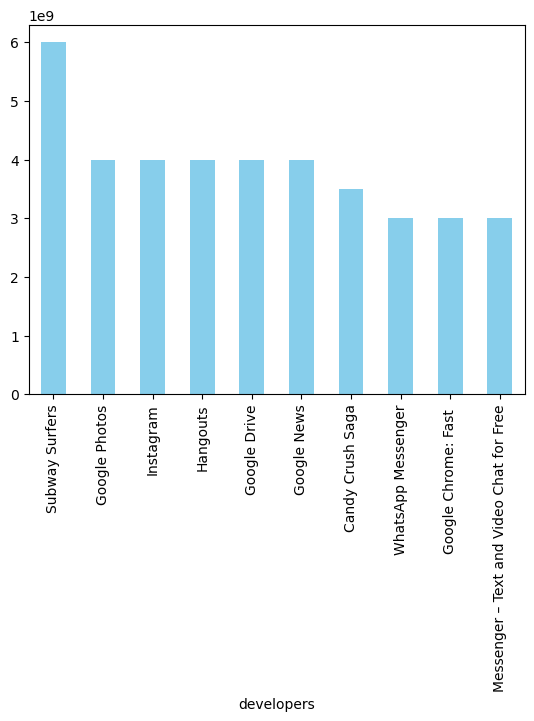

In [51]:
top_installs_developers.plot(kind="bar",color='skyblue')

## Insights

- First of all i will create developers feature from App feature.
- I have used three features developers,App,Installs.
- Developers from Subway Surfers,Google Photos and Instagram have the most installs. 

## Q17

In [52]:
df_copy.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,developers
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Photo Editor
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Coloring book moana
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,"U Launcher Lite – FREE Live Cool Themes, Hide ..."


In [57]:
df_copy["Last Updated"] = pd.to_datetime(df_copy["Last Updated"])


In [59]:
df_copy.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,developers
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,Photo Editor
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Coloring book moana
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,"U Launcher Lite – FREE Live Cool Themes, Hide ..."


In [62]:
df_copy["Day"] = df_copy["Last Updated"].dt.day
df_copy["Month"] = df_copy["Last Updated"].dt.month
df_copy["Year"] = df_copy["Last Updated"].dt.year

In [63]:
df_copy.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,developers,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,Photo Editor,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Coloring book moana,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,"U Launcher Lite – FREE Live Cool Themes, Hide ...",1,8,2018


In [64]:
monthly_grp = df_copy.groupby("Month")

In [89]:
Top_monthly_developers = monthly_grp["Installs"].sum().sort_values(ascending=False)

In [90]:
Top_monthly_developers

Month
7     74442911579
8     68668379529
6      8186207674
5      6232315327
4      2893864919
11     1618368297
1      1186499286
3      1186028825
12     1150350147
2      1017961455
10      590374124
9       460172325
Name: Installs, dtype: int64

## Insights

- Most of the installations happened at the month of July and August

In [67]:
cat_month_grp = df_copy.groupby(["Month","Category"])

In [69]:
cat_month_grp["Installs"].sum().sort_values(ascending=False).head()

Month  Category     
7      GAME             23201620563
8      COMMUNICATION    17975286405
7      COMMUNICATION    12140858675
       SOCIAL            8644151136
8      PRODUCTIVITY      8484921265
Name: Installs, dtype: int64

## Insights

- In the month of July  the Game Category has earned most installations (23201620563)
- In the month of August the Communication has earned the most installations (17975286405)

In [98]:
year_cat_month_grp = df_copy.groupby(["Year"])

In [99]:
Year_installs = year_cat_month_grp['Installs'].sum().sort_values(ascending=False).head(5)

In [100]:
Year_installs

Year
2018    161331294479
2017      4071454839
2016      1401495793
2015       424541475
2014       269956226
Name: Installs, dtype: int64

## Insights

- Mostb of the installations happened in the year 2018

In [86]:
year_cat_month_grp = df_copy.groupby(["Year","Category"])

In [92]:
year_Category = year_cat_month_grp["Installs"].sum().sort_values(ascending=False).head()

In [93]:
year_Category

Year  Category     
2018  GAME             33052192901
      COMMUNICATION    32548874886
      PRODUCTIVITY     13963101723
      SOCIAL           13924137461
      TOOLS            10633528879
Name: Installs, dtype: int64

## Insights

- In 2018,the game category has earned more number of installations
- And in 2018,Communication has the second highets number of installations after Game Category

<Axes: xlabel='Month'>

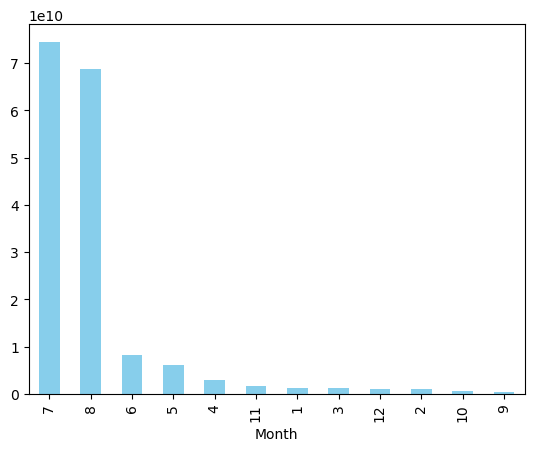

In [91]:
Top_monthly_developers.plot(kind='bar',color='skyblue')

<Axes: xlabel='Year,Category'>

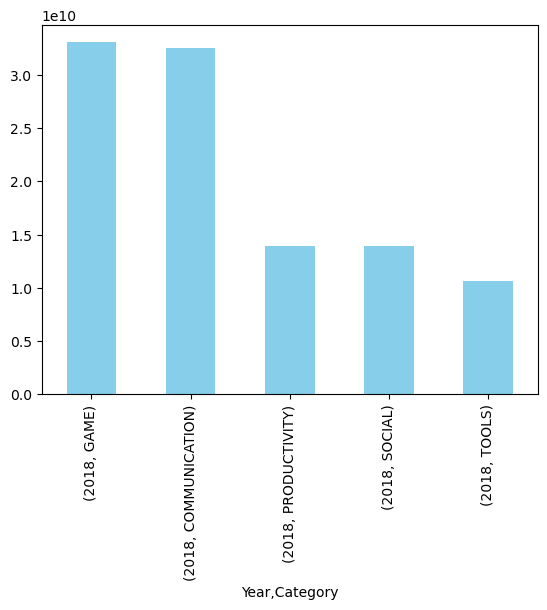

In [94]:
year_Category.plot(kind="bar",color="skyblue")

<Axes: xlabel='Year'>

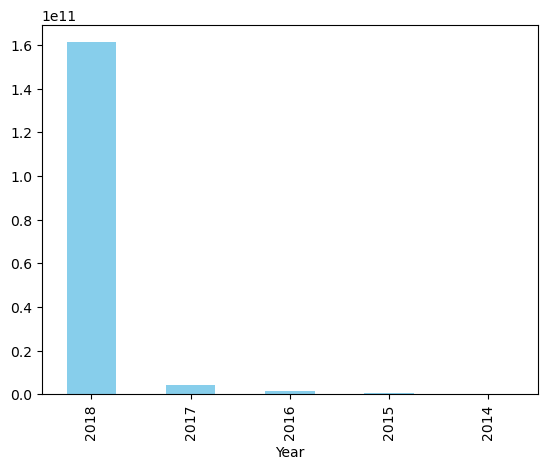

In [101]:
Year_installs.plot(kind="bar",color="skyblue")